In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cnaster_rs import CnasterGraph
from cnaster_rs import (
    get_triangular_lattice,
    get_slices_triangular_lattice_edges,
    nearest_neighbor_edges,
)

In [3]:
ground_sites = get_triangular_lattice(10, 10, 0.0)
first_sites = get_triangular_lattice(20, 20, 2.5, x0=(-2.5, -2.5))

sites = np.vstack([ground_sites, first_sites])
sites[:10, :]

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [9., 0., 0.]])

In [4]:
nxys = np.array([[10, 10], [20, 20]], dtype=np.uint64)

edges = get_slices_triangular_lattice_edges([ground_sites, first_sites], nxys)
edges

array([[  0,   1],
       [  0,  10],
       [  1,   2],
       ...,
       [498, 479],
       [499, 498],
       [499, 479]], dtype=uint64)

Text(0.5, 0, '$z$')

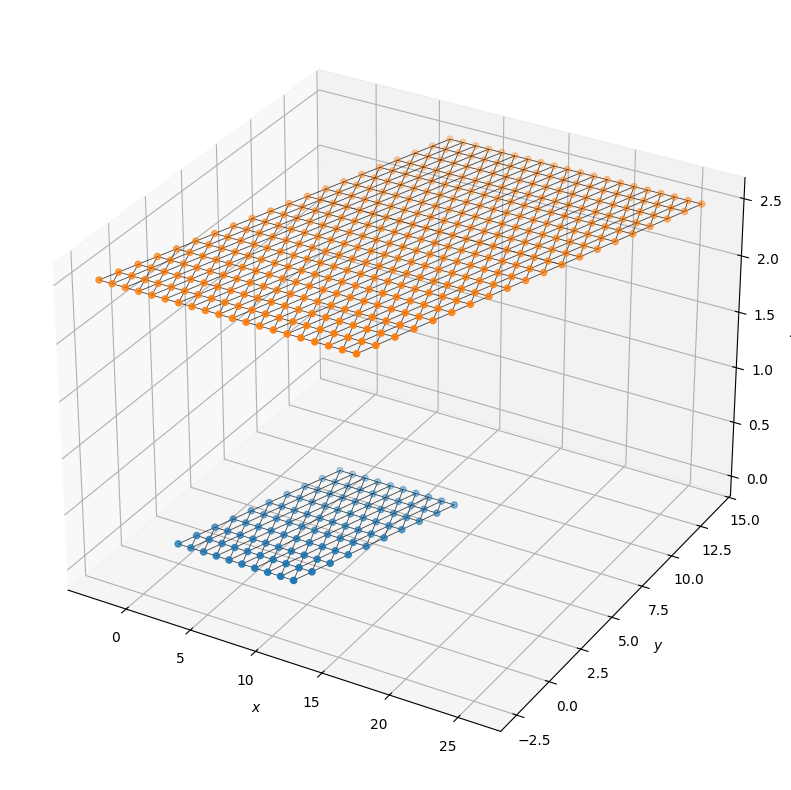

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(ground_sites[:, 0], ground_sites[:, 1], ground_sites[:, 2])
ax.scatter(first_sites[:, 0], first_sites[:, 1], first_sites[:, 2])

for from_idx, to_idx in edges:
    x = [sites[from_idx, 0], sites[to_idx, 0]]
    y = [sites[from_idx, 1], sites[to_idx, 1]]
    z = [sites[from_idx, 2], sites[to_idx, 2]]

    ax.plot(x, y, z, color="black", linewidth=0.5, alpha=0.5)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

In [6]:
alignment_edges, alignment_weights = nearest_neighbor_edges(
    [ground_sites, first_sites], 4, max_distance=5.0
)
alignment_edges

array([[  0, 161],
       [  0, 141],
       [  0, 142],
       ...,
       [429,  99],
       [429,  98],
       [430,  99]], dtype=uint64)

Text(0.5, 0, '$z$')

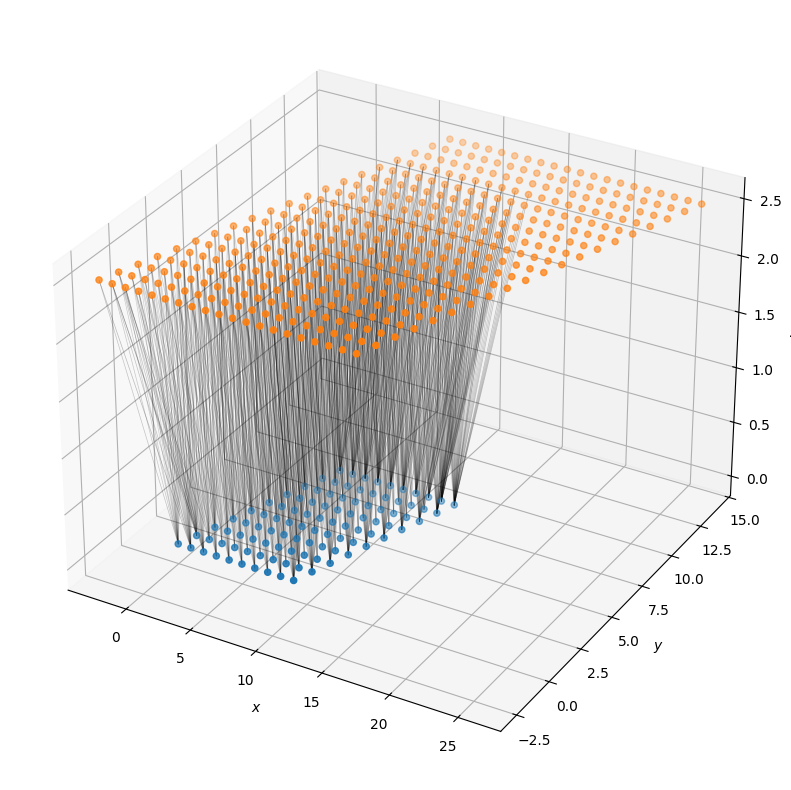

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(ground_sites[:, 0], ground_sites[:, 1], ground_sites[:, 2])
ax.scatter(first_sites[:, 0], first_sites[:, 1], first_sites[:, 2])

normed_edge_weights = alignment_weights / alignment_weights.max()

for (from_idx, to_idx), weight in zip(alignment_edges, normed_edge_weights):
    x = [sites[from_idx, 0], sites[to_idx, 0]]
    y = [sites[from_idx, 1], sites[to_idx, 1]]
    z = [sites[from_idx, 2], sites[to_idx, 2]]

    ax.plot(x, y, z, color="k", linewidth=0.5, alpha=0.25 * weight)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

In [8]:
graph = CnasterGraph(sites, np.ones((len(sites), 2)))
graph.update_adjacency_list(edges)
graph.update_adjacency_list(alignment_edges, alignment_weights)

graph

CnasterGraph(num_nodes=500, num_edges=4137, num_unique_labels=1, mean_coverage=[1.0, 1.0])

# Done.